<a href="https://colab.research.google.com/github/nguyenduychinh/AI_24_02_23/blob/main/ai_10_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

127.35320304017381


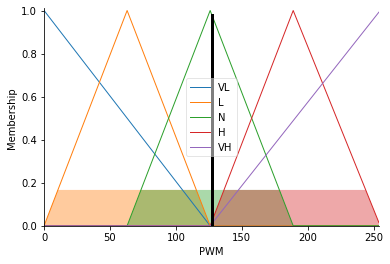

In [ ]:
from skfuzzy.control.controlsystem import ControlSystemSimulation
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
temp= ctrl.Antecedent(np.arange(18,30,1),'Temp')
sensor = ctrl.Antecedent(np.arange(-5,60,1),'Sensor')
pwm = ctrl.Consequent(np.arange(0,255,1),'PWM')

temp['thap']=fuzz.trimf(temp.universe,[18,18,24])
temp['binhthuong']=fuzz.trimf(temp.universe,[18,24,30])
temp['cao']=fuzz.trimf(temp.universe,[24,24,30])
sensor['ratthap']=fuzz.trimf(sensor.universe,[-5,-5,28])
sensor['thap']=fuzz.trimf(sensor.universe,[-5,12,28])
sensor['binhthuong']=fuzz.trimf(sensor.universe,[12,28,45])
sensor['cao']=fuzz.trimf(sensor.universe,[28,45,60])
sensor['ratcao']=fuzz.trimf(sensor.universe,[28,60,60])
pwm['VL']=fuzz.trimf(pwm.universe,[0,0,126])
pwm['L']=fuzz.trimf(pwm.universe,[0,63,126])
pwm['N']=fuzz.trimf(pwm.universe,[63,126,189])
pwm['H']=fuzz.trimf(pwm.universe,[126,189,255])
pwm['VH']=fuzz.trimf(pwm.universe,[126,255,255])

luat1 = ctrl.Rule(temp['thap'] & sensor['ratthap'],pwm['VL'])
luat2 = ctrl.Rule(temp['thap'] & sensor['thap'],pwm['VL'])
luat3 = ctrl.Rule(temp['thap'] & sensor['binhthuong'],pwm['L'])
luat4 = ctrl.Rule(temp['thap'] & sensor['cao'],pwm['N'])
luat5 = ctrl.Rule(temp['thap'] & sensor['ratcao'],pwm['N'])
luat6 = ctrl.Rule(temp['binhthuong'] & sensor['ratthap'],pwm['L'])
luat7 = ctrl.Rule(temp['binhthuong'] & sensor['thap'],pwm['L'])
luat8 = ctrl.Rule(temp['binhthuong'] & sensor['binhthuong'],pwm['N'])
luat9 = ctrl.Rule(temp['binhthuong'] & sensor['cao'],pwm['H'])
luat10 = ctrl.Rule(temp['binhthuong'] & sensor['ratcao'],pwm['H'])
luat11 = ctrl.Rule(temp['cao'] & sensor['ratthap'],pwm['L'])
luat12 = ctrl.Rule(temp['cao'] & sensor['thap'],pwm['N'])
luat13 = ctrl.Rule(temp['cao'] & sensor['binhthuong'],pwm['H'])
luat14 = ctrl.Rule(temp['cao'] & sensor['cao'],pwm['VH'])
luat15 = ctrl.Rule(temp['cao'] & sensor['ratcao'],pwm['VH'])

tipping_ctrl = ctrl.ControlSystem([luat1,luat2,luat3,luat4,luat5,luat6,luat7,luat8,luat9,luat10,luat11,luat12,luat13,luat14,luat15])
tipping = ControlSystemSimulation(tipping_ctrl)
tipping.input['Temp']=29
tipping.input['Sensor']=25
tipping.compute()
print(tipping.output['PWM'])
pwm.view(sim = tipping)



101.7870826491517
140.00000000000017


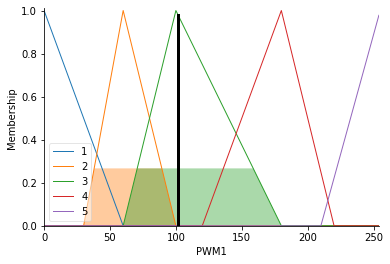

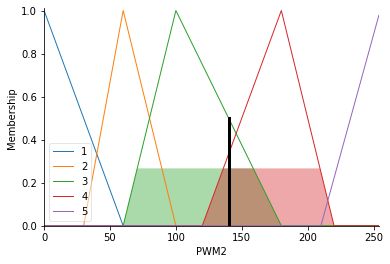

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

l = ctrl.Antecedent(np.arange(0, 150, 1), 'l')
c = ctrl.Antecedent(np.arange(0, 150, 1), 'c')
r = ctrl.Antecedent(np.arange(0, 150, 1), 'r')
lc= ctrl.Antecedent(np.arange(0, 90, 1), 'lc')
rc= ctrl.Antecedent(np.arange(-90, 0, 1), 'rc')
pwm1 = ctrl.Consequent(np.arange(0, 255, 1), 'PWM1')
pwm2 = ctrl.Consequent(np.arange(0, 255, 1), 'PWM2')
lc= ctrl.Consequent(np.arange(0, 90, 1), 'lc')
rc= ctrl.Consequent(np.arange(-90, 0, 1), 'rc')


l ['low']=fuzz.trimf(l.universe,[0,0,75])
l ['medium']=fuzz.trimf(l.universe,[0,75,150])
l ['high']=fuzz.trimf(l.universe,[75,150,150])


c ['low']=fuzz.trimf(c.universe,[0,0,75])
c ['medium']=fuzz.trimf(c.universe,[0,75,150])
c ['high']=fuzz.trimf(c.universe,[75,150,150])

r ['low']=fuzz.trimf(r.universe,[0,0,75])
r ['medium']=fuzz.trimf(r.universe,[0,75,150])
r ['high']=fuzz.trimf(r.universe,[75,150,150])

lc ['low']=fuzz.trimf(lc.universe,[0,0,45])
lc ['medium']=fuzz.trimf(lc.universe,[0,45,90])
lc ['high']=fuzz.trimf(lc.universe,[45,90,90])

rc ['low']=fuzz.trimf(rc.universe,[-90,-90,-45])
rc ['medium']=fuzz.trimf(rc.universe,[-90,-45,0])
rc ['high']=fuzz.trimf(rc.universe,[-45,0,0])

pwm1['1']=fuzz.trimf(pwm1.universe,[0,0,60])
pwm1['2']=fuzz.trimf(pwm1.universe,[30,60,100])
pwm1['3']=fuzz.trimf(pwm1.universe,[60,100,180])
pwm1['4']=fuzz.trimf(pwm1.universe,[120,180,220])
pwm1['5']=fuzz.trimf(pwm1.universe,[210,255,255])

pwm2['1']=fuzz.trimf(pwm2.universe,[0,0,60])
pwm2['2']=fuzz.trimf(pwm2.universe,[30,60,100])
pwm2['3']=fuzz.trimf(pwm2.universe,[60,100,180])
pwm2['4']=fuzz.trimf(pwm2.universe,[120,180,220])
pwm2['5']=fuzz.trimf(pwm2.universe,[210,255,255])


rule1=ctrl.Rule(r['low']&c['low']&l['medium'],rc['low'])
rule2=ctrl.Rule(r['low']&c['low']&l['high'],rc['medium'])
rule3=ctrl.Rule(r['medium']&c['medium']&l['low'],rc['medium'])
rule4=ctrl.Rule(r['medium']&c['medium']&l['high'],rc['high'])
rule5=ctrl.Rule(r['high']&c['high']&l['low'],rc['low'])
rule6=ctrl.Rule(r['high']&c['high']&l['medium'],rc['high'])

rule7=ctrl.Rule(r['low']&c['low']&l['medium'],lc['low'])
rule8=ctrl.Rule(r['low']&c['low']&l['high'],lc['medium'])
rule9=ctrl.Rule(r['medium']&c['medium']&l['low'],lc['medium'])
rule11=ctrl.Rule(r['medium']&c['medium']&l['high'],lc['high'])
rule12=ctrl.Rule(r['high']&c['high']&l['low'],lc['low'])
rule13=ctrl.Rule(r['high']&c['high']&l['medium'],lc['high'])

rule14=ctrl.Rule(l['low']&c['low']&r['low'],[pwm1['5'],pwm2['5']])
rule15=ctrl.Rule(l['medium']&c['medium']&r['medium'],[pwm1['3'],pwm2['3']])
rule16=ctrl.Rule(l['high']&c['high']&r['high'],[pwm1['1'],pwm2['1']])
rule17=ctrl.Rule(lc['low'],[pwm1['4'],pwm2['5']])
rule18=ctrl.Rule(lc['medium'],[pwm1['2'],pwm2['4']])
rule19=ctrl.Rule(lc['high'],[pwm1['1'],pwm2['3']])
rule20=ctrl.Rule(rc['low'],[pwm1['4'],pwm2['5']])
rule21=ctrl.Rule(rc['medium'],[pwm1['2'],pwm2['4']])
rule22=ctrl.Rule(rc['high'],[pwm1['1'],pwm2['3']])


tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['r']=80
tipping.input['l']=50
tipping.input['c']=20
tipping.compute()
print(tipping.output['PWM1'])
print(tipping.output['PWM2'])

pwm1.view(sim=tipping)
pwm2.view(sim=tipping)










In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=577a25f0dddbc94339a697809605f393c564f07a2094a7e806626cb88e7478bb
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
